In [3]:
from qiskit import QuantumCircuit

from qiskit.providers.ibmq import IBMQ, least_busy
IBMQ.save_account(token="1fe4ce1b8edb6b3beeb02b9d17f39551a5cff261a545b1ee19bef888399da4bba828527b74bcd4c2b3b670445a8748a2df010606ec942d43dadcdc3b25322234")
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
device = least_busy(
            provider.backends(
                filters= lambda x: not x.configuration().simulator
            )
        )
print(f'Running on {device.name()}')

from qiskit import transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram


configrc.store_credentials:WARNING:2023-01-06 13:19:04,464: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-01-06 13:19:04,806: Credentials are already in use. The existing account in the session will be replaced.


Running on ibmq_belem


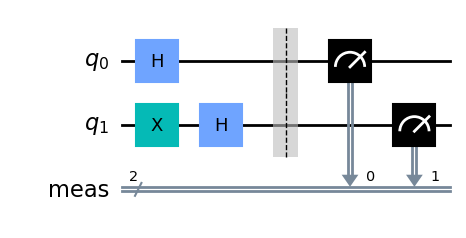

Job Status: job has successfully run


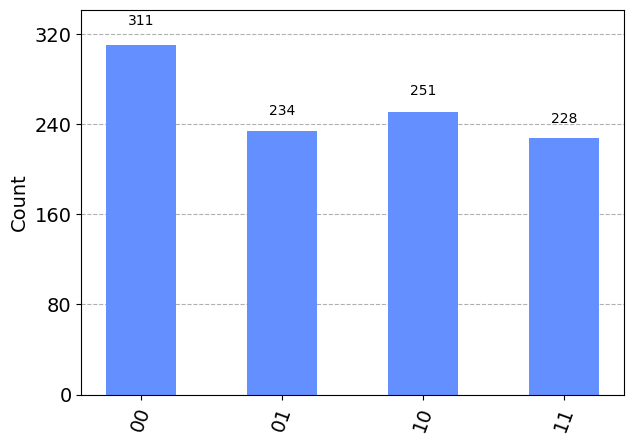

In [4]:
h_gate = QuantumCircuit(2)
h_gate.h(0)
h_gate.x(1)
h_gate.h(1)
h_gate.measure_all()
display(h_gate.draw(output="mpl"))

job_h_gate = device.run(transpile(h_gate, device), shots=1024)
job_monitor(job_h_gate)
plot_histogram(job_h_gate.result().get_counts())

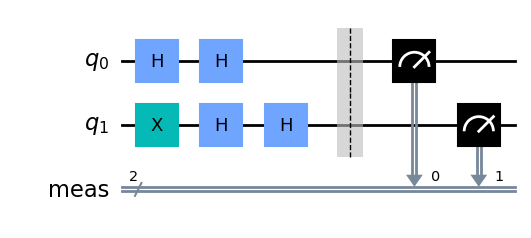

Job Status: job has successfully run


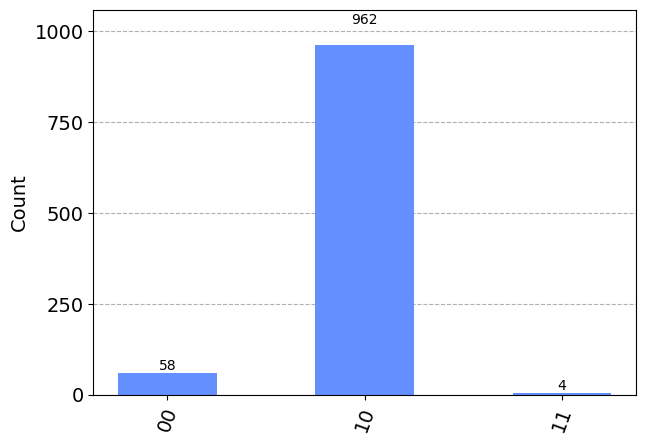

In [5]:
hh_gate = QuantumCircuit(2)
hh_gate.h(0)
hh_gate.h(0)
hh_gate.x(1)
hh_gate.h(1)
hh_gate.h(1)
hh_gate.measure_all()
display(hh_gate.draw(output="mpl"))

job_hh_gate = device.run(transpile(hh_gate, device), shots=1024)
job_monitor(job_hh_gate)
plot_histogram(job_hh_gate.result().get_counts())

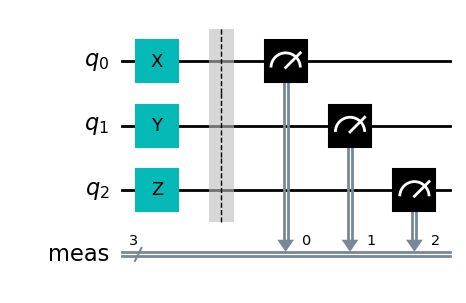

Job Status: job has successfully run


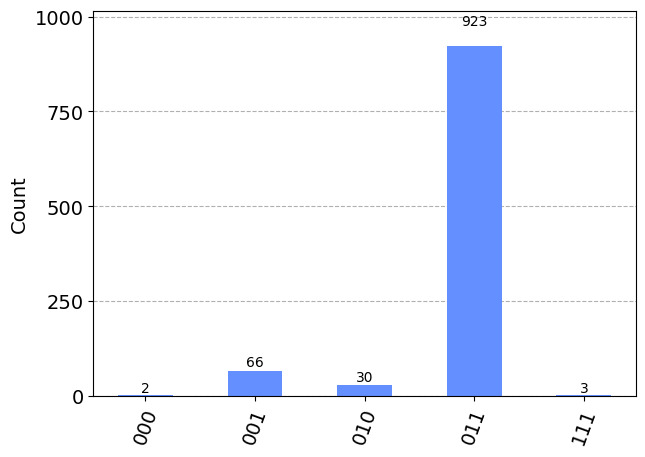

In [6]:
xyz_gate = QuantumCircuit(3)
xyz_gate.x(0)
xyz_gate.y(1)
xyz_gate.z(2)
xyz_gate.measure_all()
display(xyz_gate.draw(output="mpl"))

job_xyz_gate = device.run(transpile(xyz_gate, device), shots=1024)
job_monitor(job_xyz_gate)
plot_histogram(job_xyz_gate.result().get_counts())

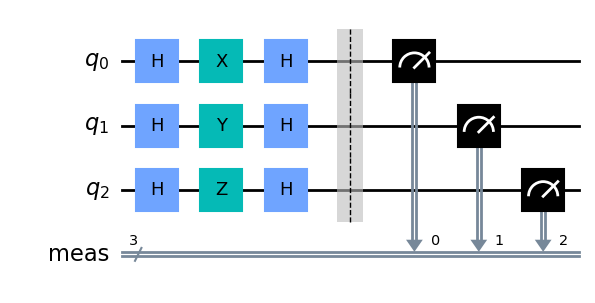

Job Status: job has successfully run


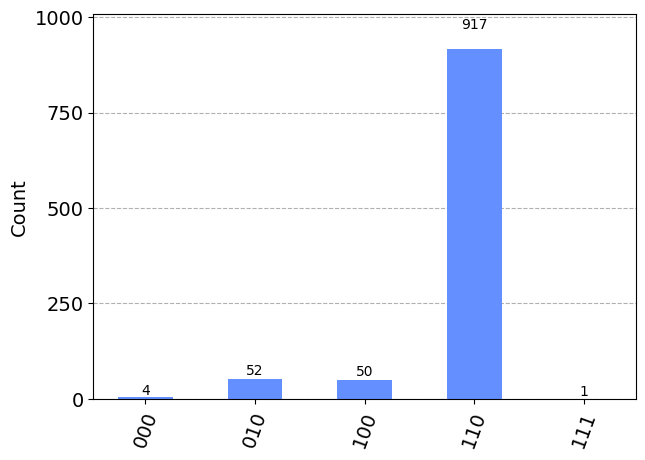

In [7]:
xyz_hh = QuantumCircuit(3)
xyz_hh.h([0,1,2])
xyz_hh.x(0)
xyz_hh.y(1)
xyz_hh.z(2)
xyz_hh.h([0,1,2])
xyz_hh.measure_all()
display(xyz_hh.draw(output="mpl"))

job_xyz_hh = device.run(transpile(xyz_hh, device), shots=1024)
job_monitor(job_xyz_hh)
plot_histogram(job_xyz_hh.result().get_counts())